# Load Data

In [1]:
import pandas as pd
import numpy as np

datavacc = pd.read_csv("dataset-title.csv", sep=";", encoding="latin-1")
# melihat data
datavacc
# melihat jumlah baris dan kolom
# datavacc.shape

,judul,tanggal,Kategori Sumber,link,label
0,MUI Larang Gunakan Vaksin Covid-19 asal Tiongkok,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,Menteri Agama Terkena Covid-19 hanya Hoaks aga...,07-Oct-20,pesan whatsapp,-,1
2,Vaksin Covid-19 Dapat Mengubah DNA Manusia,19-Oct-20,Facebook,https://archive.vn/cEu8t,1
3,Jawa Barat Jadi Daerah Pertama yang Disuntik V...,03-Nov-20,Kominfo,https://www.liputan6.com/news/read/4389620/sat...,1
4,BPOM Halangi Penyuntikan Vaksin Covid-19,03-Nov-20,Kominfo,https://www.kominfo.go.id/content/detail/30566...,1
...,...,...,...,...,...
1448,Vaksin Booster Bertujuan Melindungi Dan Menjad...,11 Januari 2022,Website Covid19.co.id,https://covid19.go.id/artikel/2022/01/11/vaksi...,0
1449,Mixing Vaccine di Indonesia Diperuntukkan Bagi...,26 Agustus 2021,Website Covid19.co.id,https://covid19.go.id/artikel/2021/08/26/mixin...,0
1450,Satgas : Vaksin Anak Adalah Perlindungan Ekstr...,23-Dec-21,Website Covid19.co.id,https://covid19.go.id/artikel/2021/12/23/satga...,0
1451,IDI OPTIMIS VAKSINASI AKAN HENTIKAN PENULARAN ...,15-Dec-20,Website Covid19.co.id,https://covid19.go.id/artikel/2020/12/15/idi-o...,0


In [2]:
datavacc.shape

(1453, 5)

In [3]:
datavacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   judul            1453 non-null   object
 1   tanggal          1453 non-null   object
 2   Kategori Sumber  1453 non-null   object
 3   link             1453 non-null   object
 4   label            1453 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 56.9+ KB


In [4]:
display("Data ",datavacc.describe())

'Data '

,label
count,1453.000000
mean,0.306951
std,0.461388
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


Cek Missing Values

In [5]:
# mengecek data nan
def null_table(datavacc):
#     print("Test Data Frame")
    print(pd.isnull(datavacc).sum())

null_table(datavacc)

judul              0
tanggal            0
Kategori Sumber    0
link               0
label              0
dtype: int64


Check Duplicate

In [6]:
print("Data :",datavacc.duplicated().sum())

Data : 5


In [7]:
datavacc.drop_duplicates(keep = False, inplace = True)

In [8]:
print("Data :",datavacc.duplicated().sum())

Data : 0


# Analisis Deskriptif

In [9]:
# melihat banyak nya jumlah judul berita HOAX = 1 dan berita SALAH = 0
datavacc['label'].value_counts()

0    1007
1     436
Name: label, dtype: int64

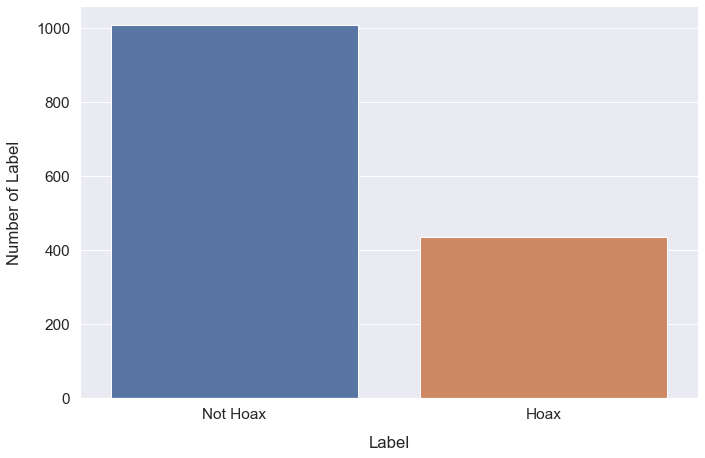

In [10]:
import matplotlib.pyplot as plt
# _, ax1 = plt.subplots(figsize=(6,5))
# stars_histogram = datavacc['label'].value_counts().sort_index()
# stars_histogram.plot(kind='bar', width=0.7, color='cyan')
# plt.xlabel('label')
# plt.ylabel('jumlah judul')

# plt.tight_layout()
# plt.show

import seaborn as sns
sns.set(font_scale=1.4)
g = sns.catplot(x='label', kind='count', data=datavacc, height=6.27, aspect=9.7/6.27)
g.set_xticklabels(['Not Hoax', 'Hoax'])
plt.xlabel("Label", labelpad=14)
plt.ylabel("Number of Label", labelpad=14)
plt.show()

Preprocessing (Mengubah dataset agar dapat diolah pada algoritam ML)

In [11]:
# menghapus baris jika ada data kosong
datavacc= datavacc.dropna()
datavacc.shape

(1443, 5)

Case Folding

In [12]:
# Mengubah semua huruf kapital menjadi huruf kecil atau lower text

datavacc['judul'] = datavacc['judul'].str.lower()
datavacc.head(2)

,judul,tanggal,Kategori Sumber,link,label
0,mui larang gunakan vaksin covid-19 asal tiongkok,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,menteri agama terkena covid-19 hanya hoaks aga...,07-Oct-20,pesan whatsapp,-,1


In [14]:
datavacc.to_csv("CaseFolding-justtitle.csv", index=False)

Cleansing 

In [13]:
# pembersihan text dari tab, new line, back slice, mention, link, hastag dan URL

import string
# regex library
import re 

def clean_text(text):
    # menghapus newline, tab dan back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ")
    # menghapus non ASCII (emoticon, chiness word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hastag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\s+)"," ", text).split())
    # menghapus incomplete URL
    return text.replace("htpp://", " ").replace("htpps://"," ")

datavacc['judul'] = datavacc['judul'].apply(clean_text)
datavacc.head(5)

,judul,tanggal,Kategori Sumber,link,label
0,mui larang gunakan vaksin covid-19 asal tiongkok,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,menteri agama terkena covid-19 hanya hoaks aga...,07-Oct-20,pesan whatsapp,-,1
2,vaksin covid-19 dapat mengubah dna manusia,19-Oct-20,Facebook,https://archive.vn/cEu8t,1
3,jawa barat jadi daerah pertama yang disuntik v...,03-Nov-20,Kominfo,https://www.liputan6.com/news/read/4389620/sat...,1
4,bpom halangi penyuntikan vaksin covid-19,03-Nov-20,Kominfo,https://www.kominfo.go.id/content/detail/30566...,1


In [15]:
datavacc.to_csv("Cleansing-justtitle.csv", index=False)

In [84]:
# Remove Number

def remove_number(text):
    return re.sub(r"\d+", "", text)

datavacc['judul'] = datavacc['judul'].apply(remove_number)
datavacc.head(5)

,judul,tanggal,Kategori Sumber,link,label
0,mui larang gunakan vaksin covid- asal tiongkok,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,menteri agama terkena covid- hanya hoaks agar ...,07-Oct-20,pesan whatsapp,-,1
2,vaksin covid- dapat mengubah dna manusia,19-Oct-20,Facebook,https://archive.vn/cEu8t,1
3,jawa barat jadi daerah pertama yang disuntik v...,03-Nov-20,Kominfo,https://www.liputan6.com/news/read/4389620/sat...,1
4,bpom halangi penyuntikan vaksin covid-,03-Nov-20,Kominfo,https://www.kominfo.go.id/content/detail/30566...,1


In [16]:
datavacc.to_csv("RemoveNumber-justtitle.csv", index=False)

In [17]:
# Remove Punctuation

def remove_punctuation(text):
    return text.translate(str.maketrans("","", string.punctuation))

datavacc['judul'] = datavacc['judul'].apply(remove_punctuation)
datavacc.head(2)

,judul,tanggal,Kategori Sumber,link,label
0,mui larang gunakan vaksin covid19 asal tiongkok,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,menteri agama terkena covid19 hanya hoaks agar...,07-Oct-20,pesan whatsapp,-,1


In [18]:
datavacc.to_csv("RemovePunctuation-justtitle.csv", index=False)

In [19]:
# Remove Single Char

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b","", text)

datavacc['judul'] = datavacc['judul'].apply(remove_single_char)
datavacc.head(2)

,judul,tanggal,Kategori Sumber,link,label
0,mui larang gunakan vaksin covid19 asal tiongkok,07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,menteri agama terkena covid19 hanya hoaks agar...,07-Oct-20,pesan whatsapp,-,1


In [20]:
datavacc.to_csv("SingleChar-justtitle.csv", index=False)

Tokenizing

In [21]:
#pemisahan teks menjadi potongan kata
 
from nltk.tokenize import word_tokenize
import nltk

# NLTK word token
def tokenz(text):
    token = nltk.word_tokenize(text)
    return token

datavacc['judul'] = datavacc['judul'].apply(tokenz) 
datavacc.head(2)

,judul,tanggal,Kategori Sumber,link,label
0,"[mui, larang, gunakan, vaksin, covid19, asal, ...",07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,"[menteri, agama, terkena, covid19, hanya, hoak...",07-Oct-20,pesan whatsapp,-,1


In [22]:
datavacc.to_csv("Tokenizing-justtitle.csv", index=False)

In [23]:
datavacc['judul'].tolist()

[['mui', 'larang', 'gunakan', 'vaksin', 'covid19', 'asal', 'tiongkok'],
 ['menteri',
  'agama',
  'terkena',
  'covid19',
  'hanya',
  'hoaks',
  'agar',
  'rakyat',
  'divaksin'],
 ['vaksin', 'covid19', 'dapat', 'mengubah', 'dna', 'manusia'],
 ['jawa',
  'barat',
  'jadi',
  'daerah',
  'pertama',
  'yang',
  'disuntik',
  'vaksin',
  'covid19'],
 ['bpom', 'halangi', 'penyuntikan', 'vaksin', 'covid19'],
 ['vaksin', 'covid19', 'berbasis', 'mrna', 'bisa', 'rusak', 'dna', 'manusia'],
 ['masyarakat',
  'zimbabwe',
  'terkena',
  'penyakit',
  'kulit',
  'berair',
  'akibat',
  'vaksin',
  'dan',
  'kemungkinan',
  'besar',
  'indonesia',
  'bisa',
  'mengalami',
  'hal',
  'yang',
  'sama'],
 ['rakyat', 'indonesia', 'akan', 'dibunuh', 'vaksin', 'china'],
 ['vaksin', 'mengandung', 'aluminium', 'bisa', 'merusak', 'otak'],
 ['vaksin',
  'yang',
  'disimpan',
  'dalam',
  'suhu',
  '80',
  'derajat',
  'bisa',
  'memanipulasi',
  'gen'],
 ['pendaftaran', 'penerima', 'vaksin', 'covid19', 'sino

Spell Normalization

In [24]:
# penyeragaman kata yang memiliki makna yang sama namun penulisan yang berbeda

normalizad_word = pd.read_excel("normalisasi.xlsx")
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(doc):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in doc]

datavacc['judul'] = datavacc['judul'].apply(normalized_term) 
datavacc.head(2)

,judul,tanggal,Kategori Sumber,link,label
0,"[mui, larang, gunakan, vaksin, covid19, asal, ...",07-Oct-20,Facebook,https://covid19.go.id/artikel/2020/10/07/awas-...,1
1,"[menteri, agama, terkena, covid19, hanya, hoak...",07-Oct-20,pesan whatsapp,-,1


In [25]:
datavacc.to_csv("Normalisasi-justtitle.csv", index=False)

RANDOM FOREST

In [90]:
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import gensim
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score


In [91]:

list_accuracy, list_precision, list_recall, list_f1 = [], [], [], []

In [92]:
#split data use ratio 80:20

for i in range(5):
    # split dataset
    train, test = train_test_split(datavacc, test_size=0.2)

    # model gensim word2vec
    w2v_model = gensim.models.Word2Vec(train['judul'], vector_size=100, window=5, min_count=2) 

    # display word vectors for each word in the sentence
    words = set(w2v_model.wv.index_to_key)
    x_train_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in train['judul']]), dtype='object')

    x_test_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in test['judul']]), dtype='object')


    # calculate the sentence vector by averaging the word vector in the sentence
    x_train_vect_avg = []
    for v in x_train_vect:
        if v.size:
            x_train_vect_avg.append(v.mean(axis=0))
            
        else:
            x_train_vect_avg.append(np.zeros(100, dtype=float))

    x_test_vect_avg = []
    for v in x_test_vect:
        if v.size:
            x_test_vect_avg.append(v.mean(axis=0))
        else:
            x_test_vect_avg.append(np.zeros(100, dtype=float))

    # length of train and test average vector
    print(len(x_train_vect_avg), len(x_test_vect_avg))

    x_train_vect_avg = pd.DataFrame(x_train_vect_avg)

    x_test_vect_avg = pd.DataFrame(x_test_vect_avg)

    y_train = train['label']
    y_test = test['label']

    # instantiating the random over sampler 
    ros = RandomOverSampler()
    # resampling X, y
    x_train_ros, y_train_ros = ros.fit_resample(x_train_vect_avg, y_train)
    # new class distribution 
    print(Counter(y_train_ros))

    
    # grid parameters for random forest
    parameters = {
        'n_estimators' : [50, 75, 100], 
        'min_samples_leaf' : [1, 2, 4],
        'min_samples_split' : [2, 5, 10]
    }

    # k-fold method cross validation
    kf=KFold(n_splits=5, shuffle=False) 
    model_rf = RandomForestClassifier(random_state=49)
    clf = GridSearchCV(model_rf,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=kf)                     # number of folds

    # train model
    clf.fit(x_train_ros,y_train_ros)
    
    print("Tuned Hyperparameters :", clf.best_params_)
    print("Best Accuracy :",clf.best_score_)

    # looking for the best parameters
    best_parameters = clf.best_params_

    # classification RF
    y_pred_rf = clf.predict(x_test_vect_avg)
    presisi = precision_score(y_test, y_pred_rf) 
    recall = recall_score(y_test, y_pred_rf) 
    accuracy = accuracy_score(y_test, y_pred_rf)
    f1 = f1_score(y_test, y_pred_rf)
    print('Precision Test: {} / Recall Test: {} / Accuracy Test: {} / F1 Test: {}'.format( 
        round(presisi, 4), round(recall, 4), round(accuracy, 4), round(f1, 4)))

    # list of evaluation metric values
    list_accuracy.append(accuracy)
    list_precision.append(presisi)
    list_recall.append(recall)
    list_f1.append(f1)

1154 289
Counter({0: 806, 1: 806})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy : 0.8393746514624156
Precision Test: 0.5424 / Recall Test: 0.3636 / Accuracy Test: 0.7128 / F1 Test: 0.4354
1154 289
Counter({1: 810, 0: 810})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy : 0.8407407407407408
Precision Test: 0.5455 / Recall Test: 0.3913 / Accuracy Test: 0.7024 / F1 Test: 0.4557
1154 289
Counter({1: 808, 0: 808})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy : 0.8372854794939417
Precision Test: 0.5556 / Recall Test: 0.3889 / Accuracy Test: 0.7128 / F1 Test: 0.4575
1154 289
Counter({0: 808, 1: 808})
Tuned Hyperparameters : {'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy : 0.847198333524443
Precision Test: 0.5357 / Recall Test: 0.3333 / Accuracy Test: 0.7024 / F1 Test: 0.411
1154

In [93]:
print(list_accuracy, np.mean(list_accuracy)) 
print(list_precision, np.mean(list_precision))
print(list_recall, np.mean(list_recall))
print(list_f1, np.mean(list_f1))

[0.71280276816609, 0.7024221453287197, 0.71280276816609, 0.7024221453287197, 0.6920415224913494] 0.7044982698961937
[0.5423728813559322, 0.5454545454545454, 0.5555555555555556, 0.5357142857142857, 0.47368421052631576] 0.530556295721327
[0.36363636363636365, 0.391304347826087, 0.3888888888888889, 0.3333333333333333, 0.4235294117647059] 0.38013846908987575
[0.43537414965986393, 0.4556962025316456, 0.4575163398692811, 0.41095890410958896, 0.44720496894409933] 0.44135011302289573


Adaboost

In [94]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [95]:
list_accuracy_Adb, list_precision_Adb, list_recall_Adb, list_f1_Adb = [], [], [], []

In [96]:
for i in range(5):
    # split dataset
    train, test = train_test_split(datavacc, test_size=0.2)

     # model gensim word2vec
    w2v_model = gensim.models.Word2Vec(train['judul'], vector_size=100, window=5, min_count=2)

   # display word vectors for each word in the sentence
    words = set(w2v_model.wv.index_to_key)
    x_train_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in train['judul']]), dtype='object')

    x_test_vect = np.array(([np.array([w2v_model.wv[i] for i in ls if i in words])
                            for ls in test['judul']]), dtype='object')

    # calculate the sentence vector by averaging the word vector in the sentence
    x_train_vect_avg = []
    for v in x_train_vect:
        if v.size:
            x_train_vect_avg.append(v.mean(axis=0))
            
        else:
            x_train_vect_avg.append(np.zeros(100, dtype=float))

    x_test_vect_avg = []
    for v in x_test_vect:
        if v.size:
            x_test_vect_avg.append(v.mean(axis=0))
        else:
            x_test_vect_avg.append(np.zeros(100, dtype=float))


    # length of train and test average vector
    print(len(x_train_vect_avg), len(x_test_vect_avg))

    x_train_vect_avg = pd.DataFrame(x_train_vect_avg)

    x_test_vect_avg = pd.DataFrame(x_test_vect_avg)

    y_train = train['label']
    y_test = test['label']

    # instantiating the random over sampler 
    ros = RandomOverSampler()
    # resampling X, y
    x_train_ros, y_train_ros = ros.fit_resample(x_train_vect_avg, y_train)
    # new class distribution 
    print(Counter(y_train_ros))

    
    # parameter grid for Adaboost
    parameters = {
        'n_estimators' : [100, 150],
        'learning_rate' : [0.5, 0.01, 0.2, 0.3, 0.4]
    }

    # k-fold method cross validation
    kf=KFold(n_splits=5, shuffle=False) 
    model_adaboost = AdaBoostClassifier(random_state=49)
    clfdaboost = GridSearchCV(model_adaboost,                    # model
                    param_grid = parameters,   # hyperparameters
                    scoring='accuracy',        # metric for scoring
                    cv=kf)                     # number of folds

    # train model
    clfdaboost.fit(x_train_ros,y_train_ros)
    
    print("Tuned Hyperparameters adaboost:", clfdaboost.best_params_)
    print("Best Accuracy adaboost :",clfdaboost.best_score_)

    # looking for the best parameters
    best_parameters = clf.best_params_

    # classification Adaboost

    y_pred_adb = clfdaboost.predict(x_test_vect_avg)
    presisi = precision_score(y_test, y_pred_adb) 
    recall = recall_score(y_test, y_pred_adb) 
    accuracy = accuracy_score(y_test, y_pred_adb)
    f1 = f1_score(y_test, y_pred_adb)
    print('Precision Test: {} / Recall Test: {} / Accuracy Test: {} / F1 Test: {}'.format( 
        round(presisi, 4), round(recall, 4), round(accuracy, 4), round(f1, 4)))

    # list of evaluation metric values
    list_accuracy_Adb.append(accuracy)
    list_precision_Adb.append(presisi)
    list_recall_Adb.append(recall)
    list_f1_Adb.append(f1)

1154 289
Counter({1: 807, 0: 807})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.7490760148452974
Precision Test: 0.5463 / Recall Test: 0.6629 / Accuracy Test: 0.7266 / F1 Test: 0.599
1154 289
Counter({0: 810, 1: 810})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.7419753086419754
Precision Test: 0.4955 / Recall Test: 0.5978 / Accuracy Test: 0.6782 / F1 Test: 0.5419
1154 289
Counter({0: 807, 1: 807})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.7627444570505548
Precision Test: 0.4828 / Recall Test: 0.6292 / Accuracy Test: 0.6782 / F1 Test: 0.5463
1154 289
Counter({0: 803, 1: 803})
Tuned Hyperparameters adaboost: {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy adaboost : 0.7372651457982624
Precision Test: 0.4333 / Recall Test: 0.6118 / Accuracy Test: 0.6505 / F1 Test: 0.5073
1154 289
Counter({1: 814, 0: 814}

In [97]:
print(list_accuracy_Adb, np.mean(list_accuracy_Adb))
print(list_precision_Adb, np.mean(list_precision_Adb))
print(list_recall_Adb, np.mean(list_recall_Adb))
print(list_f1_Adb, np.mean(list_f1_Adb))

[0.726643598615917, 0.6782006920415224, 0.6782006920415224, 0.6505190311418685, 0.6955017301038062] 0.6858131487889272
[0.5462962962962963, 0.4954954954954955, 0.4827586206896552, 0.43333333333333335, 0.53125] 0.4978267491629561
[0.6629213483146067, 0.5978260869565217, 0.6292134831460674, 0.611764705882353, 0.7083333333333334] 0.6420117915265764
[0.598984771573604, 0.541871921182266, 0.5463414634146342, 0.5073170731707317, 0.6071428571428571] 0.5603316172968186
